# Text - illustration relations

In this notebook, we try to explore relations between the size ofillustrations and text, in the journals. This is just the very beginning of an analysis that should be done more in depth, for example comparing between journals, illustrations types, periods,...

In [72]:
# Some imports
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt

We load files with data about the text, and data about the illustrations sizes.

In [40]:
with open('data/complete_texts_page_gallica.json', 'r') as fp:
    page_texts = json.load(fp)
with open('data/illu_ratios.json', 'r') as fp:
    ratios = json.load(fp)

In [41]:
# This is a dictionnary where the key is <data entry id>_<page number>
# And the value is the length of the text of the page (number of characters)
len_page_texts = {k: len(v) for k, v in page_texts.items()}

In [38]:
# This is a dictionnary where the key is ILLU_<data entry id>_<page number>_<id of illu in page>
# And the value corresponds to how much place in the page the illustration occupies
ratios = {k.split("_")[1] + "_" + k.split("_")[2]: v for k, v in ratios.items()}

Now, let's try to make just a simple visualisation : plotting the length of the text versus the size of the illustration, and see whether or not we get some results. We would expect to have some inverse relation between them : the larger an image is, the less text there is on the page.

In [59]:
# Creating dataframe for the visualisation
test = pd.DataFrame()
test["id"] = ratios.keys()
test["ratios"] = ratios.values()
# For each key (an illustration), we add the text length by looking into the corresponding page in the dictionnary
# If no text is found, the value is -1
# /!\ This does not mean that we remove illustrations with a text length of 0, but only texts that we couldn't get an OCR
test["len_txt"] = test.apply(lambda row: len_page_texts.get(row["id"].split("_")[1] + "_" + row["id"].split("_")[2], -1), axis=1)

In [61]:
# We remove illustrations from which we didn't find any OCR
test = test[test["len_txt"]!=-1]

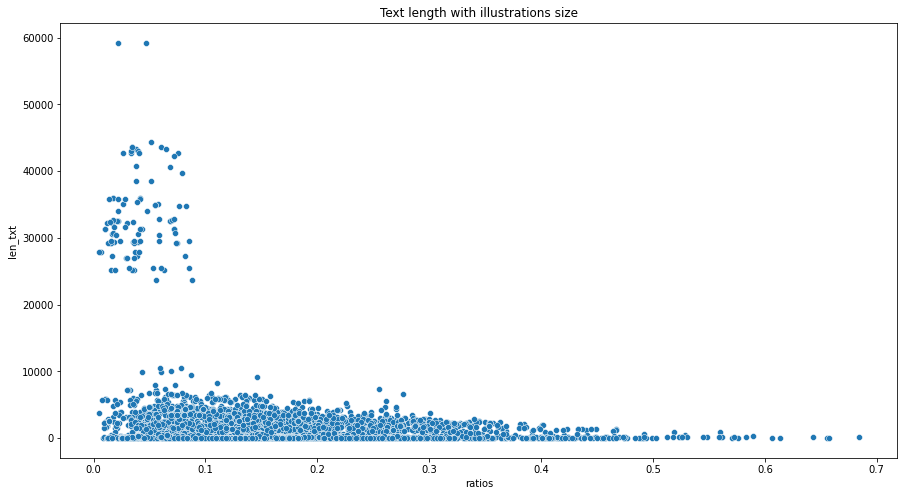

In [78]:
# And we plot everything
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=test, x="ratios", y="len_txt").set(title='Text length with illustrations size')

We observe that while the text lengths become smaller as the illustrations are bigger, there is a cluster of outliers of very small illustrations but abnormally long texts. This hypothesis is that it corresponds to journals that have a "newspapers" kind of layout. In the next part of the project, we will dive into the different layouts of the journals present in the database. 